In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

data = "C:/Programación/Lab Intermedio/Muones/muon2.data"
data = pd.read_csv(data, delimiter=' ')

print(data)

        40000  1724454158
0       40000  1724454159
1       40009  1724454160
2       40004  1724454161
3       40002  1724454162
4       40006  1724454163
...       ...         ...
329866  40000  1724776017
329867  40000  1724776018
329868  40000  1724776019
329869  40000  1724776020
329870  40000  1724776021

[329871 rows x 2 columns]


In [3]:
df=pd.DataFrame(data)
df=df.rename(columns={'40000':'Tiempo','1724454158':'Fecha'})
df

,Tiempo,Fecha
0,40000,1724454159
1,40009,1724454160
2,40004,1724454161
3,40002,1724454162
4,40006,1724454163
...,...,...
329866,40000,1724776017
329867,40000,1724776018
329868,40000,1724776019
329869,40000,1724776020


In [4]:
df1=df.drop('Fecha', axis=1)
df1=df1[df1['Tiempo']<40000]*10**(-3)
df1

,Tiempo
67,0.32
70,0.32
93,4.68
118,3.66
137,1.72
...,...
329657,0.90
329675,5.98
329689,0.80
329714,0.50


In [5]:
filas=len(df1)

In [94]:
conteo_df = df1.groupby('Tiempo').size().reset_index(name='Cantidad')
#conteo_df=df1.groupby('error-Tiempo').size().reset_index(name='Cantidad')
conteo_df['Error Tiempo']=0.01
conteo_df['Error decay']=0.1
conteo_df

,Tiempo,Cantidad,Error Tiempo,Error decay
0,0.04,1,0.01,0.1
1,0.06,13,0.01,0.1
2,0.08,47,0.01,0.1
3,0.10,81,0.01,0.1
4,0.12,102,0.01,0.1
...,...,...,...,...
603,19.30,1,0.01,0.1
604,19.38,1,0.01,0.1
605,19.42,1,0.01,0.1
606,19.54,1,0.01,0.1


In [95]:
Time,Cantidad=np.array(conteo_df['Tiempo']), np.array(conteo_df['Cantidad'])

In [96]:
#plt.scatter(conteo_df['Cantidad'],conteo_df['Tiempo'], s=1)

In [97]:
Ter, Der=np.array(conteo_df['Error Tiempo']),np.array(conteo_df['Error decay'])

In [98]:
f_cum=np.cumsum(Cantidad)

In [99]:
decay=filas-f_cum
#decay[-1]=1/10000000

Text(0, 0.5, 'Frecuencia')

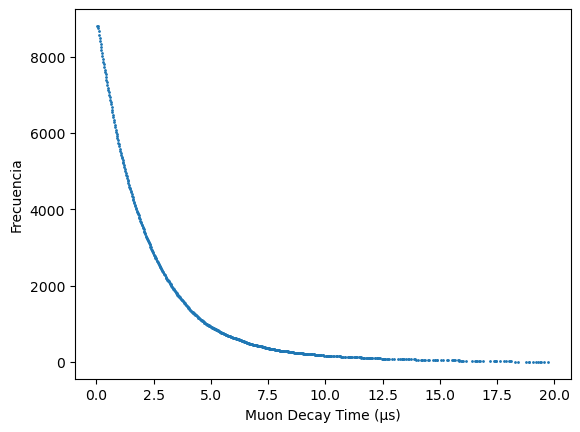

In [100]:
plt.scatter(Time, decay, s=1)
plt.xlabel('Muon Decay Time (µs)')
plt.ylabel('Frecuencia')

In [101]:
#def expo(x,a,b):
 #   return a*np.exp(-x/b)

In [102]:
param, cov= scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(-t*b) +c , Time,decay)
incert =np.sqrt(np.diag(cov))
incert

C:\Users\Personal\AppData\Local\Temp\ipykernel_19196\2302877479.py:1: RuntimeWarning: overflow encountered in exp
  param, cov= scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(-t*b) +c , Time,decay)
C:\Users\Personal\AppData\Local\Temp\ipykernel_19196\2302877479.py:1: RuntimeWarning: overflow encountered in multiply
  param, cov= scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(-t*b) +c , Time,decay)


array([4.68662496e+00, 4.62153278e-04, 1.56957435e+00])

In [103]:
param, incert

(array([8.96220762e+03, 4.70495315e-01, 7.40009170e+01]),
 array([4.68662496e+00, 4.62153278e-04, 1.56957435e+00]))

In [104]:
1/param[1]

2.1254196741679126

In [105]:
x=np.linspace(0,20,len(decay))
#y=expo(x,param[0], param[1])
y=param[0]*np.exp(-x*param[1])+param[2]
y

array([9036.20854069, 8898.34492242, 8762.60202909, 8628.94723808,
       8497.34842856, 8367.77397385, 8240.19273375, 8114.57404708,
       7990.88772433, 7869.10404039, 7749.19372739, 7631.12796768,
       7514.87838693, 7400.41704725, 7287.71644054, 7176.74948184,
       7067.48950284, 6959.91024545, 6853.9858555 , 6749.69087656,
       6647.00024375, 6545.88927778, 6446.33367899, 6348.30952152,
       6251.79324756, 6156.76166166, 6063.19192522, 5971.06155092,
       5880.34839739, 5791.03066384, 5703.08688484, 5616.49592515,
       5531.23697466, 5447.28954338, 5364.63345649, 5283.24884955,
       5203.11616365, 5124.21614079, 5046.52981918, 4970.03852874,
       4894.72388655, 4820.56779253, 4747.55242497, 4675.66023633,
       4604.87394902, 4535.1765512 , 4466.55129273, 4398.98168113,
       4332.45147762, 4266.94469323, 4202.44558492, 4138.93865185,
       4076.4086316 , 4014.84049655, 3954.21945024, 3894.5309238 ,
       3835.76057251, 3777.89427227, 3720.91811627, 3664.81841

Text(0.5, 1.0, 'Frecuencia vs. Tiempo (regresión)')

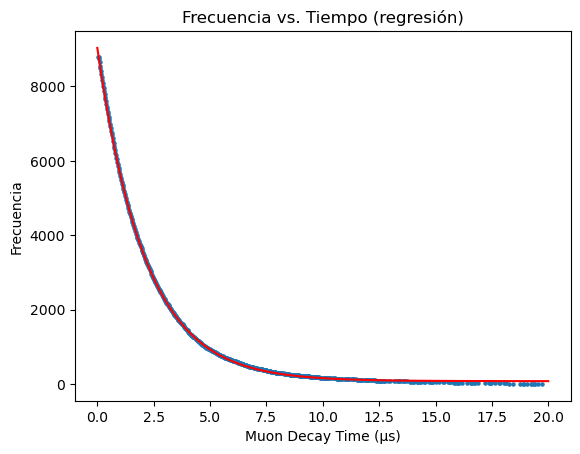

In [111]:
plt.plot(x,y,color='red')
plt.scatter(Time, decay, s=5)
#plt.errorbar(Time, decay,Ter,Der,fmt='o')
plt.xlabel('Muon Decay Time (µs)')
plt.ylabel('Frecuencia')
plt.title('Frecuencia vs. Tiempo (regresión)')

In [107]:
y_fit=param[0]*np.exp(-Time*param[1])+param[2]

In [108]:
residual=(decay-y_fit)

Text(0.5, 1.0, 'Frecuencia vs. Tiempo (regresión e incertidumbres)')

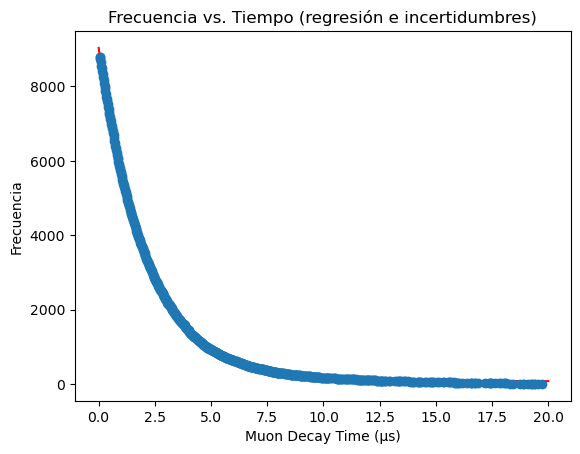

In [109]:
plt.plot(x,y,color='red')
plt.scatter(Time, decay, s=5)
plt.errorbar(Time, decay,Ter,Der,fmt='o')
plt.xlabel('Muon Decay Time (µs)')
plt.ylabel('Frecuencia')
plt.title('Frecuencia vs. Tiempo (regresión e incertidumbres)')

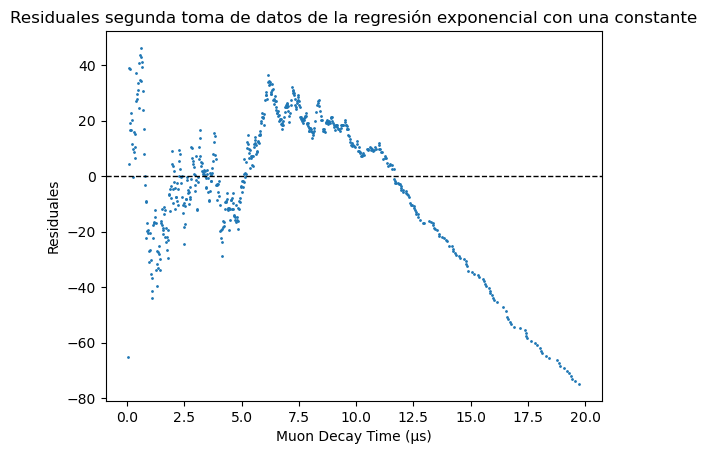

In [110]:
fig, ax = plt.subplots()
ax.set_title('Residuales segunda toma de datos de la regresión exponencial con una constante')
ax.scatter(Time,residual, s=1)
ax.set_xlabel('Muon Decay Time (µs)')
ax.set_ylabel('Residuales')
ax.axhline(0, color='black', linewidth=1, linestyle='--')